In [1]:
import pandas as pd
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt

# US

In [2]:
#category id and category for US
with open ('US_category_id.json') as us:
    us_id = json.load(us)
#pprint(us_id)
us_category={}
for item in us_id['items']:
    us_category[item['id']] = item['snippet']['title']
#us_category

In [3]:
us = pd.read_csv("USvideos.csv")
us.head()
us.dtypes
us['trending_date'] = pd.to_datetime(us['trending_date'], format = '%y.%d.%m')
us['trending_YearMonth'] = us['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
us['publish_time'] = pd.to_datetime(us['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
us_max_byMonth = us.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max() # category_id included as an index
us_view_max_byMonth = us_max_byMonth['views'].groupby(level=0, group_keys=False)
us_top20_byMonth = us_view_max_byMonth.nlargest(20)
us_top20_byMonth= us_top20_byMonth.reset_index()  # this is how to convert category_id from an index into a regular column
us_top20_byMonth['category_id'] = us_top20_byMonth['category_id'].astype(str)
us_top20_byMonth['category'] = us_top20_byMonth['category_id'].map(lambda x: us_category.get(x))
us_top20_byMonth['views'] = us_top20_byMonth['views']/1000000
us_top20_byMonth = us_top20_byMonth.rename(columns = {'views':'views(million)'})
us_top20_byMonth

,trending_YearMonth,title,category_id,views(million),category
0,2017-11,"Luis Fonsi, Demi Lovato - Échame La Culpa",10,102.012605,Music
1,2017-11,Ed Sheeran - Perfect (Official Music Video),10,43.449654,Music
2,2017-11,Marvel Studios' Avengers: Infinity War Officia...,24,37.736281,Entertainment
3,2017-11,Incredibles 2 Official Teaser Trailer,1,36.152111,Film & Animation
4,2017-11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,10,33.810576,Music
5,2017-11,Eminem - Walk On Water (Audio) ft. Beyoncé,10,26.448434,Music
6,2017-11,P!nk - Beautiful Trauma (Official Video),10,21.545253,Music
7,2017-11,"Selena Gomez, Marshmello - Wolves",10,20.752341,Music
8,2017-11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",10,17.679753,Music
9,2017-11,RAMPAGE - OFFICIAL TRAILER 1 [HD],24,15.104666,Entertainment


# GB

In [4]:
with open ('GB_category_id.json') as gb:
    gb_id = json.load(gb)
gb_category={}
for item in gb_id['items']:
    gb_category[item['id']] = item['snippet']['title']

In [5]:
gb = pd.read_csv("GBvideos.csv")
gb.head()
gb.dtypes
gb['trending_date'] = pd.to_datetime(gb['trending_date'], format = '%y.%d.%m')
gb['trending_YearMonth'] = gb['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
gb['publish_time'] = pd.to_datetime(gb['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
gb_max_byMonth = gb.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
gb_view_max_byMonth = gb_max_byMonth['views'].groupby(level=0, group_keys=False)
gb_top20_byMonth = gb_view_max_byMonth.nlargest(20)
gb_top20_byMonth= gb_top20_byMonth.reset_index()
gb_top20_byMonth['category_id'] = gb_top20_byMonth['category_id'].astype(str)
gb_top20_byMonth['category'] = gb_top20_byMonth['category_id'].map(lambda x: gb_category.get(x))
gb_top20_byMonth['views'] = gb_top20_byMonth['views']/1000000
gb_top20_byMonth = gb_top20_byMonth.rename(columns = {'views':'views(million)'})
gb_top20_byMonth

,trending_YearMonth,title,category_id,views(million),category
0,2017-11,Ed Sheeran - Perfect (Official Music Video),10,138.578860,Music
1,2017-11,Eminem - Walk On Water (Audio) ft. Beyoncé,10,39.235314,Music
2,2017-11,Post Malone - rockstar ft. 21 Savage,10,38.780141,Music
3,2017-11,Marvel Studios' Avengers: Infinity War Officia...,24,37.736281,Entertainment
4,2017-11,Post Malone - rockstar ft. 21 Savage (Official...,10,35.463645,Music
5,2017-11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,10,33.810576,Music
6,2017-11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",10,31.815783,Music
7,2017-11,Taylor Swift - Call It What You Want (Lyric Vi...,10,21.893347,Music
8,2017-11,P!nk - Beautiful Trauma (Official Video),10,21.545253,Music
9,2017-11,RAMPAGE - OFFICIAL TRAILER 1 [HD],24,19.433518,Entertainment


# CA

In [6]:
with open ('CA_category_id.json') as ca:
    ca_id = json.load(ca)
ca_category={}
for item in ca_id['items']:
    ca_category[item['id']] = item['snippet']['title']

In [7]:
ca = pd.read_csv("CAvideos.csv")
ca.head()
ca.dtypes
ca['trending_date'] = pd.to_datetime(ca['trending_date'], format = '%y.%d.%m')
ca['trending_YearMonth'] = ca['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
ca['publish_time'] = pd.to_datetime(ca['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
ca_max_byMonth = ca.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
ca_view_max_byMonth = ca_max_byMonth['views'].groupby(level=0, group_keys=False)
ca_top20_byMonth = ca_view_max_byMonth.nlargest(20)
ca_top20_byMonth= ca_top20_byMonth.reset_index()
ca_top20_byMonth['category_id'] = ca_top20_byMonth['category_id'].astype(str)
ca_top20_byMonth['category'] = ca_top20_byMonth['category_id'].map(lambda x: ca_category.get(x))
ca_top20_byMonth['views'] = ca_top20_byMonth['views']/1000000
ca_top20_byMonth = ca_top20_byMonth.rename(columns = {'views':'views(million)'})
ca_top20_byMonth

,trending_YearMonth,title,category_id,views(million),category
0,2017-11,"Luis Fonsi, Demi Lovato - Échame La Culpa",10,56.843038,Music
1,2017-11,Ed Sheeran - Perfect (Official Music Video),10,39.082222,Music
2,2017-11,Marvel Studios' Avengers: Infinity War Officia...,24,37.736281,Entertainment
3,2017-11,Post Malone - rockstar ft. 21 Savage,10,34.275219,Music
4,2017-11,Swag Se Swagat Song | Tiger Zinda Hai | Salman...,10,29.626879,Music
5,2017-11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,10,27.670973,Music
6,2017-11,Incredibles 2 Official Teaser Trailer,1,26.072307,Film & Animation
7,2017-11,Eminem - Walk On Water (Audio) ft. Beyoncé,10,24.578152,Music
8,2017-11,"Romeo Santos, Daddy Yankee, Nicky Jam - Bella ...",10,17.208914,Music
9,2017-11,DJ (Duvvada Jagannadham) 2017 New Released Ful...,1,15.940901,Film & Animation


# DE

In [8]:
with open ('DE_category_id.json') as de:
    de_id = json.load(de)
de_category={}
for item in de_id['items']:
    de_category[item['id']] = item['snippet']['title']

In [9]:
de = pd.read_csv("DEvideos.csv")
de.head()
de.dtypes
de['trending_date'] = pd.to_datetime(de['trending_date'], format = '%y.%d.%m')
de['trending_YearMonth'] = de['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
de['publish_time'] = pd.to_datetime(de['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
de_max_byMonth = de.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
de_view_max_byMonth = de_max_byMonth['views'].groupby(level=0, group_keys=False)
de_top20_byMonth = de_view_max_byMonth.nlargest(20)
de_top20_byMonth= de_top20_byMonth.reset_index()
de_top20_byMonth['category_id'] = de_top20_byMonth['category_id'].astype(str)
de_top20_byMonth['category'] = de_top20_byMonth['category_id'].map(lambda x: de_category.get(x))
de_top20_byMonth['views'] = de_top20_byMonth['views']/1000000
de_top20_byMonth = de_top20_byMonth.rename(columns = {'views':'views(million)'})
de_top20_byMonth

,trending_YearMonth,title,category_id,views(million),category
0,2017-11,"Luis Fonsi, Demi Lovato - Échame La Culpa",10,38.646917,Music
1,2017-11,Marvel Studios' Avengers: Infinity War Officia...,24,37.736281,Entertainment
2,2017-11,Ed Sheeran - Perfect (Official Music Video),10,33.523622,Music
3,2017-11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,10,24.628712,Music
4,2017-11,Incredibles 2 Official Teaser Trailer,1,19.999878,Film & Animation
5,2017-11,Post Malone - rockstar ft. 21 Savage,10,19.654814,Music
6,2017-11,Eminem - Walk On Water (Audio) ft. Beyoncé,10,17.158579,Music
7,2017-11,Water Bottle Flip 2 | Dude Perfect,17,11.474521,Sports
8,2017-11,Stranger Things Cast Answer the Web's Most Sea...,24,11.307303,Entertainment
9,2017-11,P!nk - Beautiful Trauma (Official Video),10,10.997222,Music


# FR

In [10]:
with open ('FR_category_id.json') as fr:
    fr_id = json.load(fr)
fr_category={}
for item in fr_id['items']:
    fr_category[item['id']] = item['snippet']['title']

In [11]:
fr = pd.read_csv("FRvideos.csv")
fr.head()
fr.dtypes
fr['trending_date'] = pd.to_datetime(fr['trending_date'], format = '%y.%d.%m')
fr['trending_YearMonth'] = fr['trending_date'].apply(lambda x: f'{x.year}-{x.month}')
fr['publish_time'] = pd.to_datetime(fr['publish_time'], format = '%Y-%m-%dT%H:%M:%S.%fZ')
fr_max_byMonth = fr.groupby(['trending_YearMonth','title','category_id'])['views','likes','dislikes'].max()
fr_view_max_byMonth = fr_max_byMonth['views'].groupby(level=0, group_keys=False)
fr_top20_byMonth = fr_view_max_byMonth.nlargest(20)
fr_top20_byMonth= fr_top20_byMonth.reset_index()
fr_top20_byMonth['category_id'] = fr_top20_byMonth['category_id'].astype(str)
fr_top20_byMonth['category'] = fr_top20_byMonth['category_id'].map(lambda x: fr_category.get(x))
fr_top20_byMonth['views'] = fr_top20_byMonth['views']/1000000
fr_top20_byMonth = fr_top20_byMonth.rename(columns = {'views':'views(million)'})
fr_top20_byMonth

,trending_YearMonth,title,category_id,views(million),category
0,2017-11,"Luis Fonsi, Demi Lovato - Échame La Culpa",10,47.078714,Music
1,2017-11,Ed Sheeran - Perfect (Official Music Video),10,33.523622,Music
2,2017-11,BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Offi...,10,20.565795,Music
3,2017-11,Eminem - Walk On Water (Audio) ft. Beyoncé,10,17.158579,Music
4,2017-11,Post Malone - rockstar ft. 21 Savage,10,15.162291,Music
5,2017-11,Water Bottle Flip 2 | Dude Perfect,17,10.552150,Sports
6,2017-11,"What's new, Atlas?",28,9.421291,Science & Technology
7,2017-11,Stranger Things Cast Answer the Web's Most Sea...,24,8.952634,Entertainment
8,2017-11,P!nk - Beautiful Trauma (Official Video),10,8.464537,Music
9,2017-11,Deadpool’s “Wet on Wet” Teaser,1,8.291139,Film & Animation


# 2017-11 Category Overlap

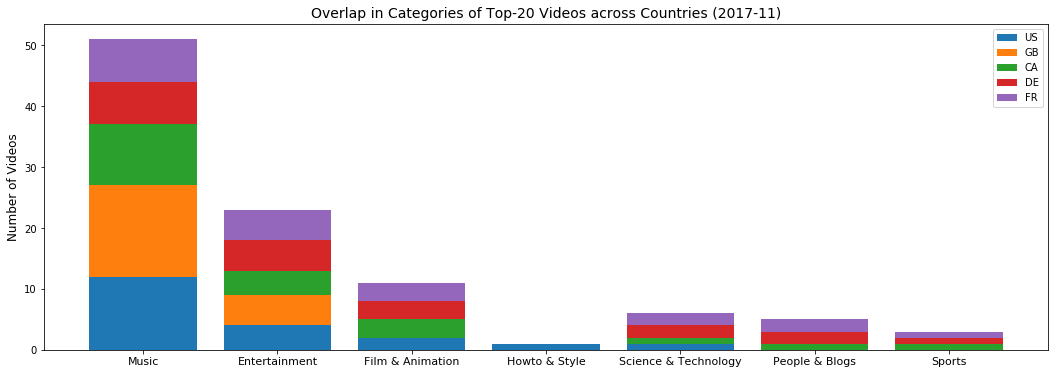

In [12]:
us_cat = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth'] =='2017-11']['category'].value_counts()
gb_cat = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth'] =='2017-11']['category'].value_counts()
ca_cat = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth'] =='2017-11']['category'].value_counts()
de_cat = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth'] =='2017-11']['category'].value_counts()
fr_cat = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth'] =='2017-11']['category'].value_counts()
unique_cats = us_cat.index.append(gb_cat.index).append(ca_cat.index).append(de_cat.index).append(fr_cat.index).unique()
cats = {}
for key in unique_cats:
    cats[key]=0
us_dict = us_cat.to_dict()
us_cats = cats.copy()
for item in us_dict:
    us_cats[item]=us_cats[item]+us_dict[item]

gb_dict = gb_cat.to_dict()
gb_cats = cats.copy()
for item in gb_dict:
    gb_cats[item]=gb_cats[item]+gb_dict[item] 

ca_dict = ca_cat.to_dict()
ca_cats = cats.copy()
for item in ca_dict:
    ca_cats[item]=ca_cats[item]+ca_dict[item] 

de_dict = de_cat.to_dict()
de_cats = cats.copy()
for item in de_dict:
    de_cats[item]=de_cats[item]+de_dict[item] 

fr_dict = fr_cat.to_dict()
fr_cats = cats.copy()
for item in fr_dict:
    fr_cats[item]=fr_cats[item]+fr_dict[item] 

plt.figure(figsize = (18,6))
p1= plt.bar(us_cats.keys(),us_cats.values())
plt.ylabel("Number of Videos", fontsize = 12)
plt.xticks(list(us_cats.keys()),fontsize = 11)
plt.title("Overlap in Categories of Top-20 Videos across Countries (2017-11)", fontsize = 14)
bottom_us = list(us_cats.values())
p2 = plt.bar(gb_cats.keys(),gb_cats.values(), bottom=bottom_us)
bottom_gb = list(gb_cats.values())
bottom_us_gb = [sum(x) for x in zip(bottom_us,bottom_gb)]
p3 = plt.bar(ca_cats.keys(),ca_cats.values(), bottom=bottom_us_gb)
bottom_ca = list(ca_cats.values())
bottom_us_gb_ca = [sum(x) for x in zip(bottom_us_gb,bottom_ca)]
p4 = plt.bar(de_cats.keys(),de_cats.values(), bottom=bottom_us_gb_ca)
bottom_de = list(de_cats.values())
bottom_us_gb_ca = [sum(x) for x in zip(bottom_us_gb_ca,bottom_de)]
p5 = plt.bar(de_cats.keys(),de_cats.values(), bottom=bottom_us_gb_ca)
plt.legend((p1,p2,p3,p4,p5),("US",'GB','CA','DE','FR'))

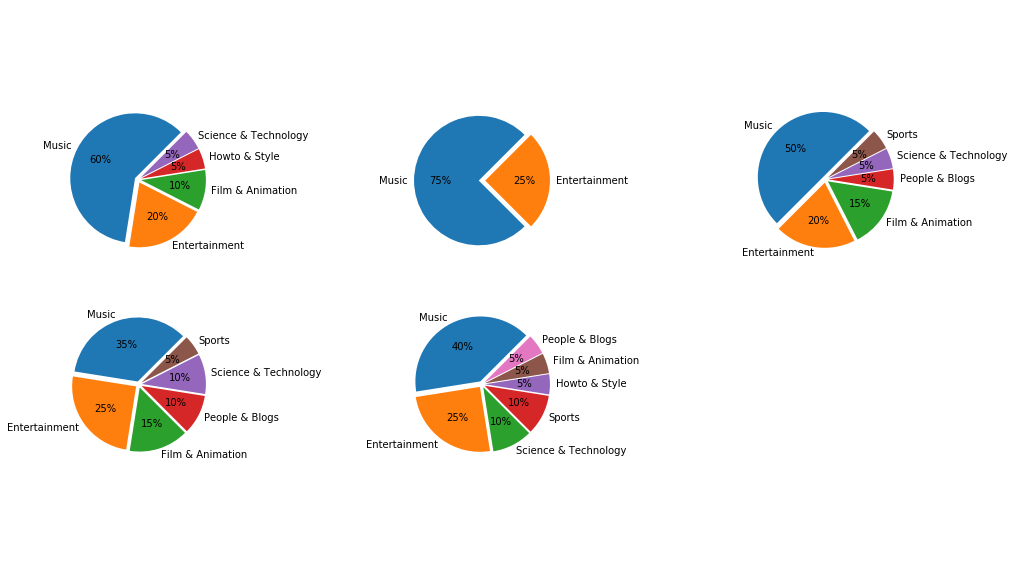

In [13]:
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.pie(us_cat,labels = us_cat.index, explode = [.05,.05,.05,.05,.05], autopct = '%.0f%%', startangle = 45)
plt.axis('equal')
plt.subplot(2,3,2)
plt.pie(gb_cat,labels = gb_cat.index, explode = [.05,.05], autopct = '%.0f%%', startangle = 45)
plt.axis('equal')
plt.subplot(2,3,3)
plt.pie(ca_cat,labels = ca_cat.index, explode = [.05,.05,.05,.05,.05,.05], autopct = '%.0f%%', startangle = 45)
plt.axis('equal')
plt.subplot(2,3,4)
plt.pie(de_cat,labels = de_cat.index, explode = [.05,.05,.05,.05,.05,.05], autopct = '%.0f%%', startangle = 45)
plt.axis('equal')
plt.subplot(2,3,5)
plt.pie(fr_cat,labels = fr_cat.index, explode = [.05,.05,.05,.05,.05,.05,.05], autopct = '%.0f%%', startangle = 45)
plt.axis('equal')
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=1.3, hspace=-.4)

In [14]:
fr_cat

Music                   8
Entertainment           5
Science & Technology    2
Sports                  2
Howto & Style           1
Film & Animation        1
People & Blogs          1
Name: category, dtype: int64

# 2017-11 Video Overlap

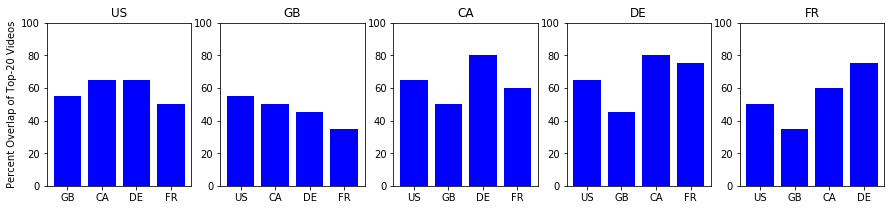

Text(3.8,56,'55.0')

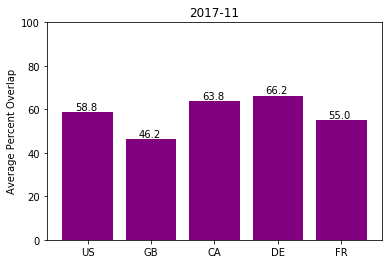

In [15]:
us_title = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth'] =='2017-11']['title']
gb_title = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth'] =='2017-11']['title']
ca_title = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth'] =='2017-11']['title']
de_title = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth'] =='2017-11']['title']
fr_title = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth'] =='2017-11']['title']
count = 0
for item in gb_title:
    if item in list(us_title):
        count = count + 1
        us_gb_overlap = int(count/20*100)

count = 0
for item in ca_title:
    if item in list(us_title):
        count = count + 1
        us_ca_overlap = int(count/20*100)
count = 0
for item in de_title:
    if item in list(us_title):
        count = count + 1
        us_de_overlap = int(count/20*100)

count = 0
for item in fr_title:
    if item in list(us_title):
        count = count + 1
        us_fr_overlap = int(count/20*100)

count = 0
for item in ca_title:
    if item in list(gb_title):
        count = count + 1
        gb_ca_overlap = int(count/20*100)
        
count = 0
for item in de_title:
    if item in list(gb_title):
        count = count + 1
        gb_de_overlap = int(count/20*100)

count = 0
for item in fr_title:
    if item in list(gb_title):
        count = count + 1
        gb_fr_overlap = int(count/20*100)

count = 0
for item in de_title:
    if item in list(ca_title):
        count = count + 1
        ca_de_overlap = int(count/20*100)
count = 0
for item in fr_title:
    if item in list(ca_title):
        count = count + 1
        ca_fr_overlap = int(count/20*100)
count = 0
for item in fr_title:
    if item in list(de_title):
        count = count + 1
        de_fr_overlap = int(count/20*100)
countries = ['US','GB','CA','DE','FR']
us_overlaps = [us_gb_overlap,us_ca_overlap,us_de_overlap,us_fr_overlap]
us_mean = np.mean(us_overlaps)
gb_overlaps = [us_gb_overlap,gb_ca_overlap,gb_de_overlap,gb_fr_overlap]
gb_mean = np.mean(gb_overlaps)
ca_overlaps = [us_ca_overlap,gb_ca_overlap,ca_de_overlap,ca_fr_overlap]
ca_mean = np.mean(ca_overlaps)
de_overlaps = [us_de_overlap,gb_de_overlap,ca_de_overlap,de_fr_overlap]
de_mean = np.mean(de_overlaps)
fr_overlaps = [us_fr_overlap,gb_fr_overlap,ca_fr_overlap,de_fr_overlap]
fr_mean = np.mean(fr_overlaps)
# table1 = pd.DataFrame({
#     'US': us_overlaps,
#     'GB': gb_overlaps,
#     'CA': ca_overlaps,
#     'DE': de_overlaps,
#     'FR': fr_overlaps,
# }, index = countries)
# print(table1)
plt.figure(figsize = (15,3))
plt.subplot(1,5,1)
plt.bar(x= ['GB','CA','DE','FR'],height=us_overlaps,color='blue')
plt.ylim(0,100)
plt.ylabel("Percent Overlap of Top-20 Videos")
plt.title("US")
plt.subplot(1,5,2)
plt.bar(x=['US','CA','DE','FR'],height=gb_overlaps,color='blue')
plt.title("GB")
plt.ylim(0,100)
plt.subplot(1,5,3)
plt.bar(x=['US','GB','DE','FR'],height=ca_overlaps,color='blue')
plt.title("CA")
plt.ylim(0,100)
plt.subplot(1,5,4)
plt.bar(x=['US','GB','CA','FR'],height=de_overlaps,color='blue')
plt.title("DE")
plt.ylim(0,100)
plt.subplot(1,5,5)
plt.bar(x=['US','GB','CA','DE'],height=fr_overlaps,color='blue')
plt.title("FR")
plt.ylim(0,100)
plt.show()
plt.bar(countries,height=[us_mean,gb_mean,ca_mean,de_mean,fr_mean],color='purple')
plt.ylabel("Average Percent Overlap")
plt.title("2017-11")
plt.ylim(0,100)
plt.annotate(f'{us_mean:.1f}',xy=(0-.2,us_mean +1))
plt.annotate(f'{gb_mean:.1f}',xy=(1-.2,gb_mean +1))
plt.annotate(f'{ca_mean:.1f}',xy=(2-.2,ca_mean +1))
plt.annotate(f'{de_mean:.1f}',xy=(3-.2,de_mean +1))
plt.annotate(f'{fr_mean:.1f}',xy=(4-.2,fr_mean +1))

# 2018-6 overlapping video growing

([<matplotlib.axis.XTick at 0x1282907b8>,
 <a list of 20 Text xticklabel objects>)

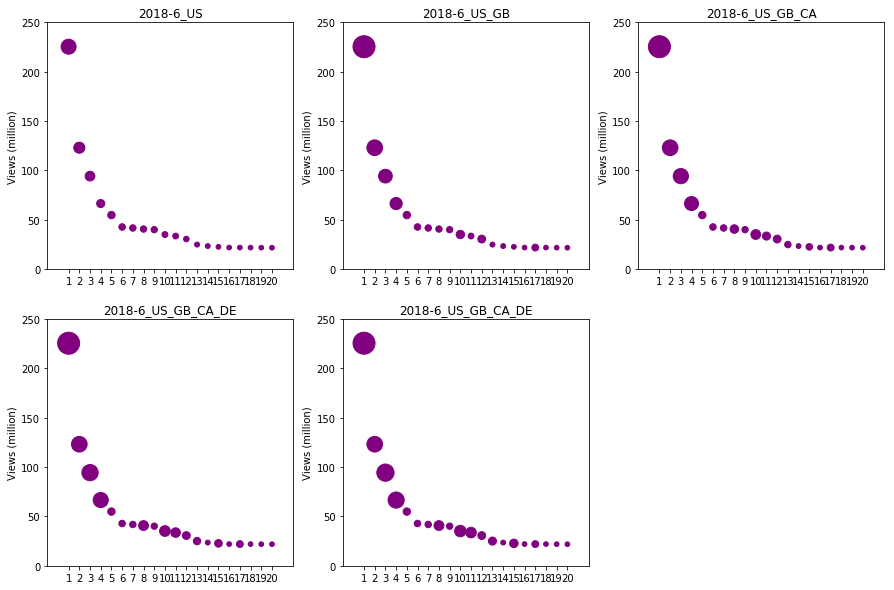

In [68]:
us_2018_6 = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth']=='2018-6',['title','views(million)']]
gb_2018_6 = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth']=='2018-6',['title','views(million)']]
ca_2018_6 = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth']=='2018-6',['title','views(million)']]
de_2018_6 = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth']=='2018-6',['title','views(million)']]
fr_2018_6 = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth']=='2018-6',['title','views(million)']]
us_dict = dict(zip(us_2018_6['title'],us_2018_6['views(million)']))
gb_dict = dict(zip(gb_2018_6['title'],gb_2018_6['views(million)']))
ca_dict = dict(zip(ca_2018_6['title'],ca_2018_6['views(million)']))
de_dict = dict(zip(de_2018_6['title'],de_2018_6['views(million)']))
fr_dict = dict(zip(fr_2018_6['title'],fr_2018_6['views(million)']))
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(np.arange(20),us_dict.values(), s = list(us_dict.values()), color = 'purple')
plt.title('2018-6_US')
plt.ylim(0,250)
plt.ylabel('Views (million)')
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.subplot(2,3,2)
us_gb_dict = us_dict.copy()
for video in gb_dict.keys():
    if video in us_gb_dict.keys():
        us_gb_dict[video] = us_gb_dict[video] + gb_dict[video]
plt.scatter(np.arange(20),us_2018_6['views(million)'], s = list(us_gb_dict.values()), color = 'purple')
plt.title('2018-6_US_GB')
plt.ylabel('Views (million)')
plt.ylim(0,250)
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.subplot(2,3,3)
us_gb_ca_dict = us_gb_dict.copy()
for video in ca_dict.keys():
    if video in us_gb_ca_dict.keys():
        us_gb_ca_dict[video] = us_gb_ca_dict[video] + ca_dict[video]
plt.scatter(np.arange(20),us_2018_6['views(million)'], s = list(us_gb_ca_dict.values()), color = 'purple')
plt.title('2018-6_US_GB_CA')
plt.ylabel('Views (million)')
plt.ylim(0,250)
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.subplot(2,3,4)
us_gb_ca_de_dict = us_gb_ca_dict.copy()
for video in de_dict.keys():
    if video in us_gb_ca_de_dict.keys():
        us_gb_ca_de_dict[video] = us_gb_ca_de_dict[video] + de_dict[video]
plt.scatter(np.arange(20),us_2018_6['views(million)'], s = list(us_gb_ca_de_dict.values()), color = 'purple')
plt.title('2018-6_US_GB_CA_DE')
plt.ylabel('Views (million)')
plt.ylim(0,250)
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.subplot(2,3,5)
us_gb_ca_de_fr_dict = us_gb_ca_de_dict.copy()
for video in fr_dict.keys():
    if video in us_gb_ca_de_fr_dict.keys():
        us_gb_ca_de_fr_dict[video] = us_gb_ca_de_fr_dict[video] + fr_dict[video]
plt.scatter(np.arange(20),us_2018_6['views(million)'], s = list(us_gb_ca_de_fr_dict.values()), color = 'purple')
plt.title('2018-6_US_GB_CA_DE')
plt.ylabel('Views (million)')
plt.ylim(0,250)
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])


([<matplotlib.axis.XTick at 0x129c76cc0>,
 <a list of 20 Text xticklabel objects>)

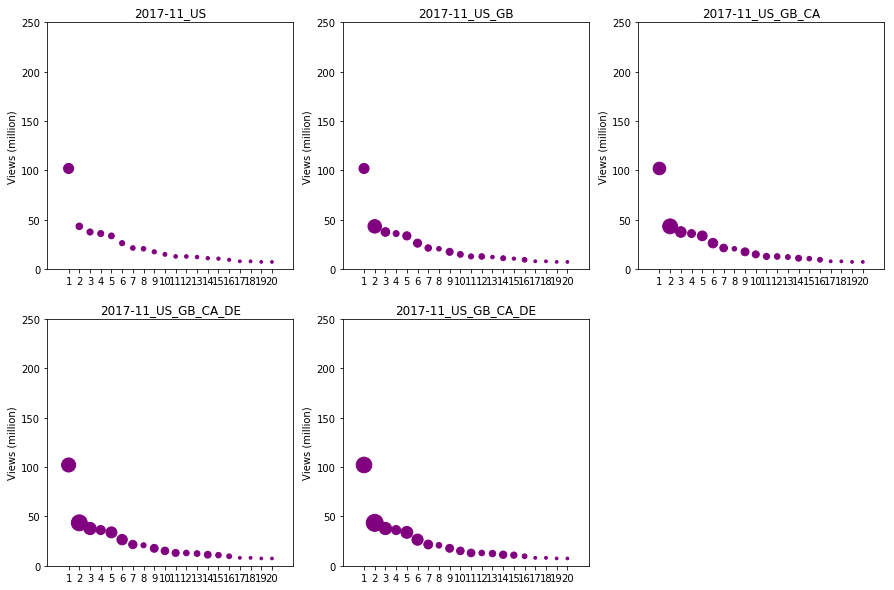

In [75]:
us_2017_11 = us_top20_byMonth.loc[us_top20_byMonth['trending_YearMonth']=='2017-11',['title','views(million)']]
gb_2017_11 = gb_top20_byMonth.loc[gb_top20_byMonth['trending_YearMonth']=='2017-11',['title','views(million)']]
ca_2017_11 = ca_top20_byMonth.loc[ca_top20_byMonth['trending_YearMonth']=='2017-11',['title','views(million)']]
de_2017_11 = de_top20_byMonth.loc[de_top20_byMonth['trending_YearMonth']=='2017-11',['title','views(million)']]
fr_2017_11 = fr_top20_byMonth.loc[fr_top20_byMonth['trending_YearMonth']=='2017-11',['title','views(million)']]
us_dict = dict(zip(us_2017_11['title'],us_2017_11['views(million)']))
gb_dict = dict(zip(gb_2017_11['title'],gb_2017_11['views(million)']))
ca_dict = dict(zip(ca_2017_11['title'],ca_2017_11['views(million)']))
de_dict = dict(zip(de_2017_11['title'],de_2017_11['views(million)']))
fr_dict = dict(zip(fr_2017_11['title'],fr_2017_11['views(million)']))
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
plt.scatter(np.arange(20),us_dict.values(), s = list(us_dict.values()), color = 'purple')
plt.title('2017-11_US')
plt.ylim(0,250)
plt.ylabel('Views (million)')
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.subplot(2,3,2)
us_gb_dict = us_dict.copy()
for video in gb_dict.keys():
    if video in us_gb_dict.keys():
        us_gb_dict[video] = us_gb_dict[video] + gb_dict[video]
plt.scatter(np.arange(20),us_2017_11['views(million)'], s = list(us_gb_dict.values()), color = 'purple')
plt.title('2017-11_US_GB')
plt.ylabel('Views (million)')
plt.ylim(0,250)
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.subplot(2,3,3)
us_gb_ca_dict = us_gb_dict.copy()
for video in ca_dict.keys():
    if video in us_gb_ca_dict.keys():
        us_gb_ca_dict[video] = us_gb_ca_dict[video] + ca_dict[video]
plt.scatter(np.arange(20),us_2017_11['views(million)'], s = list(us_gb_ca_dict.values()), color = 'purple')
plt.title('2017-11_US_GB_CA')
plt.ylabel('Views (million)')
plt.ylim(0,250)
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.subplot(2,3,4)
us_gb_ca_de_dict = us_gb_ca_dict.copy()
for video in de_dict.keys():
    if video in us_gb_ca_de_dict.keys():
        us_gb_ca_de_dict[video] = us_gb_ca_de_dict[video] + de_dict[video]
plt.scatter(np.arange(20),us_2017_11['views(million)'], s = list(us_gb_ca_de_dict.values()), color = 'purple')
plt.title('2017-11_US_GB_CA_DE')
plt.ylabel('Views (million)')
plt.ylim(0,250)
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

plt.subplot(2,3,5)
us_gb_ca_de_fr_dict = us_gb_ca_de_dict.copy()
for video in fr_dict.keys():
    if video in us_gb_ca_de_fr_dict.keys():
        us_gb_ca_de_fr_dict[video] = us_gb_ca_de_fr_dict[video] + fr_dict[video]
plt.scatter(np.arange(20),us_2017_11['views(million)'], s = list(us_gb_ca_de_fr_dict.values()), color = 'purple')
plt.title('2017-11_US_GB_CA_DE')
plt.ylabel('Views (million)')
plt.ylim(0,250)
plt.xlim(-2,21)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19],[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

